In [1]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split

과제 1: 알고리즘 성능 비교
Iris 데이터로 5가지 알고리즘 모두 실습

→ 정확도와 속도를 표로 정리

In [21]:
# 데이터 로드
iris = load_iris()
X_train, X_test, y_train, y_test = train_test_split(
    iris.data, iris.target, test_size=0.2, random_state=42
)

#X_train # 특징 4개: sepal length, sepal width, petal length, petal width
#_train # 클래스 3개: setosa(0), versicolor(1), virginica(2)

Decision Tree

In [ ]:
from sklearn.tree import DecisionTreeClassifier
import time

# 모델 생성
tree = DecisionTreeClassifier(
    criterion='gini',        # 또는 'entropy'
    max_depth=3,             # 최대 깊이
    min_samples_split=5,     # 분할 최소 샘플
    min_samples_leaf=2,      # 리프 최소 샘플
    random_state=42
)

# 학습 시간 측정
start_fit = time.perf_counter()
tree.fit(X_train, y_train)
fit_time = time.perf_counter() - start_fit

# 예측 시간 측정
start_pred = time.perf_counter()
y_pred = tree.predict(X_test)
pred_time = time.perf_counter() - start_pred

# 정확도 계산
from sklearn.metrics import accuracy_score
train_acc = accuracy_score(y_train, tree.predict(X_train))
test_acc = accuracy_score(y_test, y_pred)

print(f"Train Accuracy : {train_acc:.3f}")      # 훈련 데이터 정확도
print(f"Test Accuracy  : {test_acc:.3f}")       # 테스트 데이터 정확도
print(f"Fit Time       : {fit_time:.5f} sec")   # 학습 시간
print(f"Predict Time   : {pred_time:.5f} sec")  # 예측 시간


Train Accuracy : 0.950
Test Accuracy  : 1.000
Fit Time       : 0.00125 sec
Predict Time   : 0.00019 sec


In [15]:
criteria = ['gini', 'entropy']

for c in criteria:
    model = DecisionTreeClassifier(max_depth=3, criterion=c, random_state=42)
    model.fit(X_train, y_train)
    train_acc = model.score(X_train, y_train)
    test_acc = model.score(X_test, y_test)
    print(f"{c:<8} | Train: {train_acc:.3f} | Test: {test_acc:.3f}")


gini     | Train: 0.958 | Test: 1.000
entropy  | Train: 0.958 | Test: 1.000


Logistic Regression (로지스틱 회귀)

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score
import time

# 파이프라인 구성 (스케일링 + 로지스틱 train과 test 모두 적용하기 위해)
logit = Pipeline([
    ("scaler", StandardScaler()),  # 표준화, 각 특성을 평균 0, 표춘편차 1로 맞춰서 피처값을 동일한 스케일로 맞춤
    ("clf", LogisticRegression(max_iter=1000, random_state=42))
])

# 학습 시간
start_fit = time.perf_counter()
logit.fit(X_train, y_train)
fit_time = time.perf_counter() - start_fit

# 예측
start_pred = time.perf_counter()
y_pred = logit.predict(X_test)
pred_time = time.perf_counter() - start_pred

# 정확도 계산
train_acc = accuracy_score(y_train, logit.predict(X_train))
test_acc = accuracy_score(y_test, y_pred)

print(f"Train Accuracy : {train_acc:.3f}")
print(f"Test Accuracy  : {test_acc:.3f}")
print(f"Fit Time       : {fit_time:.5f} sec")
print(f"Predict Time   : {pred_time:.5f} sec")


Train Accuracy : 0.967
Test Accuracy  : 1.000
Fit Time       : 0.00862 sec
Predict Time   : 0.00033 sec


Naive Bayes - 각 특징이 독립이라고 가정하고, 클래스별 확률을 곱해서 가장 높은 확률의 클래스를 예측

In [20]:
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score
import time

# 모델 생성
nb = GaussianNB()

# 학습 시간 측정
start_fit = time.perf_counter()
nb.fit(X_train, y_train)
fit_time = time.perf_counter() - start_fit

# 예측 시간 측정
start_pred = time.perf_counter()
y_pred = nb.predict(X_test)
pred_time = time.perf_counter() - start_pred

# 정확도 계산
train_acc = accuracy_score(y_train, nb.predict(X_train))
test_acc = accuracy_score(y_test, y_pred)

print(f"Train Accuracy : {train_acc:.3f}")
print(f"Test Accuracy  : {test_acc:.3f}")
print(f"Fit Time       : {fit_time:.5f} sec")
print(f"Predict Time   : {pred_time:.5f} sec")


Train Accuracy : 0.950
Test Accuracy  : 1.000
Fit Time       : 0.00079 sec
Predict Time   : 0.00016 sec


KNN

In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
import time

# KNN: k=5, 유클리드 거리(기본: minkowski, p=2)
knn = Pipeline([
    ("scaler", StandardScaler()),
    ("clf", KNeighborsClassifier(n_neighbors=5,     # 샘플 결정할 이웃 개수
                                metric="minkowski", # 거리 척도 지정
                                p=2))               # p=1: Manhattan(격자거리), p=2: Euclidean(직선거리)
])

# 학습 시간
start_fit = time.perf_counter()
knn.fit(X_train, y_train)
fit_time = time.perf_counter() - start_fit

# 예측 시간
start_pred = time.perf_counter()
y_pred = knn.predict(X_test)
pred_time = time.perf_counter() - start_pred

# 정확도
train_acc = accuracy_score(y_train, knn.predict(X_train))
test_acc  = accuracy_score(y_test,  y_pred)

print(f"Train Accuracy : {train_acc:.3f}")
print(f"Test Accuracy  : {test_acc:.3f}")
print(f"Fit Time       : {fit_time:.5f} sec")
print(f"Predict Time   : {pred_time:.5f} sec")


Train Accuracy : 0.958
Test Accuracy  : 1.000
Fit Time       : 0.00473 sec
Predict Time   : 0.00209 sec


| 알고리즘                                   | 주요 특징                | 잘 맞는 상황                                                       | 주의할 점                                |
| -------------------------------------- | -------------------- | ------------------------------------------------------------- | ------------------------------------ |
| **Decision Tree (의사결정 트리)**            | 규칙 기반, 해석 쉬움, 비선형 가능 | - 데이터가 “규칙적으로” 나뉘는 경우<br>- 모델 설명이 필요한 경우<br>예: 고객 이탈 예측, 신용평가 | 과적합 위험 → `max_depth` 등 하이퍼파라미터 조정 필요 |
| **Random Forest / XGBoost**            | 트리 여러 개의 앙상블 (성능↑)   | - 특징이 많거나, 트리형 데이터 구조가 유효할 때<br>- 예측 정확도가 중요할 때               | 계산량 많음, 해석 어려움                       |
| **Logistic Regression**                | 선형 모델, 확률 출력         | - 특징과 결과 사이 관계가 “선형적”일 때<br>- 예측 확률이 필요한 문제                   | 선형 가정이 안 맞으면 성능 하락                   |
| **Naive Bayes**                        | 확률 기반, 빠르고 단순        | - 텍스트 데이터 (단어 등장 확률)<br>- 작은 데이터셋                             | 특징 간 독립 가정이 비현실적일 수 있음               |
| **LDA (Linear Discriminant Analysis)** | 클래스 간 분산 최대화         | - 라벨 간 구분이 명확할 때<br>- 차원 축소 + 분류 함께 하고 싶을 때                   | 정규분포 가정, 선형 구분 불가 데이터엔 부적합           |
| **KNN (K-Nearest Neighbors)**          | 주변 이웃으로 분류, 비선형 가능   | - 데이터 구조가 단순하고, 샘플 수가 많지 않을 때<br>- “비슷한 것끼리” 묶는 문제            | 거리 계산량 ↑, 차원 커지면 성능↓                 |
| **SVM (Support Vector Machine)**       | 마진 최대화, 경계 잘 찾음      | - 경계선이 명확하고 데이터가 복잡할 때                                        | 대규모 데이터엔 느림                          |
| **Neural Network**                     | 비선형 학습, 복잡한 패턴 탐지    | - 이미지, 음성, 텍스트 등 복잡한 패턴                                       | 학습 느림, 많은 데이터 필요                     |


과제 2: Decision Tree 깊이 실험
max_depth를 1~10까지 바꿔가며 성능 측정

→ 그래프로 시각화

In [4]:
# 데이터 로드
iris2 = load_iris()
X_train, X_test, y_train, y_test = train_test_split(
    iris2.data, iris2.target, test_size=0.2, random_state=42
)

In [5]:
from sklearn.tree import DecisionTreeClassifier
import time

# 모델 생성
tree = DecisionTreeClassifier(
    criterion='gini',        # 또는 'entropy'
    max_depth=3,             # 최대 깊이
    min_samples_split=5,     # 분할 최소 샘플
    min_samples_leaf=2,      # 리프 최소 샘플
    random_state=42
)

# 학습 시간 측정
start_fit = time.perf_counter()
tree.fit(X_train, y_train)
fit_time = time.perf_counter() - start_fit

# 예측 시간 측정
start_pred = time.perf_counter()
y_pred = tree.predict(X_test)
pred_time = time.perf_counter() - start_pred

# 정확도 계산
from sklearn.metrics import accuracy_score
train_acc = accuracy_score(y_train, tree.predict(X_train))
test_acc = accuracy_score(y_test, y_pred)

print(f"Train Accuracy : {train_acc:.3f}")      # 훈련 데이터 정확도
print(f"Test Accuracy  : {test_acc:.3f}")       # 테스트 데이터 정확도
print(f"Fit Time       : {fit_time:.5f} sec")   # 학습 시간
print(f"Predict Time   : {pred_time:.5f} sec")  # 예측 시간

Train Accuracy : 0.950
Test Accuracy  : 1.000
Fit Time       : 0.00144 sec
Predict Time   : 0.00025 sec


In [11]:
import matplotlib.pyplot as plt

depths = range(1, 11)
train_scores, test_scores = [], []

for d in depths:
    model = DecisionTreeClassifier(max_depth=d, random_state=42)
    model.fit(X_train, y_train)
    train_scores.append(model.score(X_train, y_train))
    test_scores.append(model.score(X_test, y_test))
    print(f"depth={d:2d} | Train: {train_scores[-1]:.3f} | Test: {test_scores[-1]:.3f}")



depth= 1 | Train: 0.675 | Test: 0.633
depth= 2 | Train: 0.950 | Test: 0.967
depth= 3 | Train: 0.958 | Test: 1.000
depth= 4 | Train: 0.975 | Test: 1.000
depth= 5 | Train: 0.992 | Test: 1.000
depth= 6 | Train: 1.000 | Test: 1.000
depth= 7 | Train: 1.000 | Test: 1.000
depth= 8 | Train: 1.000 | Test: 1.000
depth= 9 | Train: 1.000 | Test: 1.000
depth=10 | Train: 1.000 | Test: 1.000


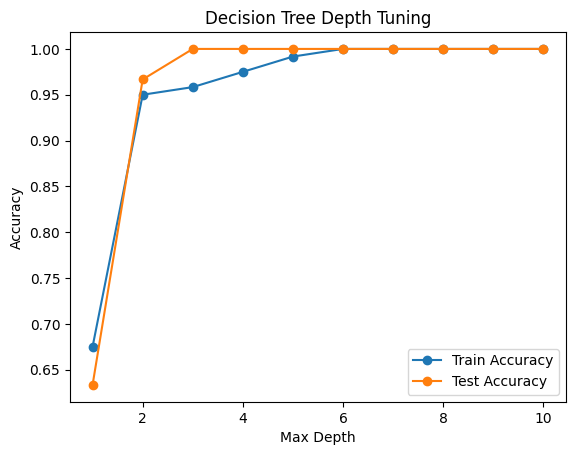

In [8]:
plt.plot(depths, train_scores, label='Train Accuracy', marker='o')
plt.plot(depths, test_scores, label='Test Accuracy', marker='o')
plt.xlabel('Max Depth')
plt.ylabel('Accuracy')
plt.title('Decision Tree Depth Tuning')
plt.legend()
plt.show()

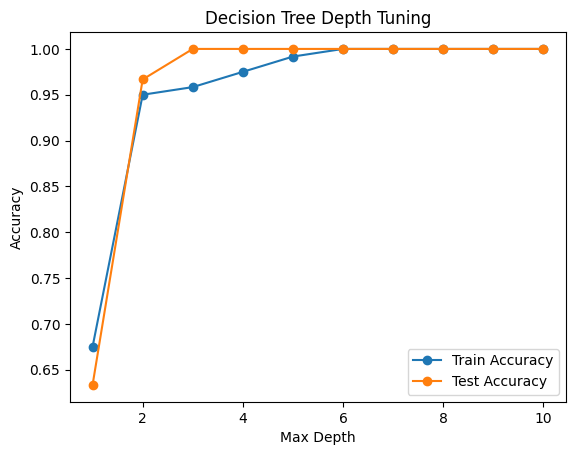

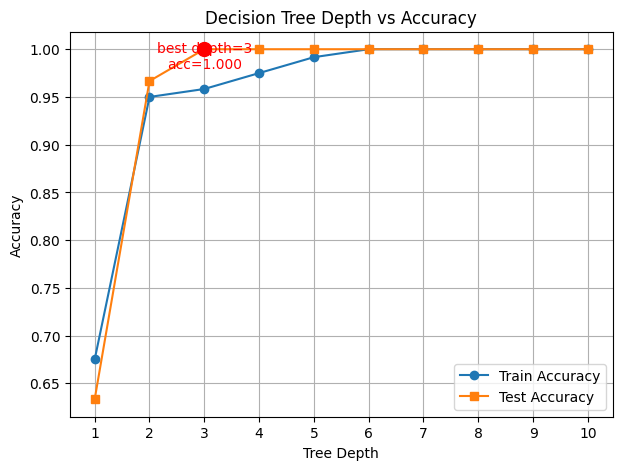

In [14]:
plt.figure(figsize=(7, 5))
plt.plot(depths, train_scores, marker='o', label='Train Accuracy')
plt.plot(depths, test_scores, marker='s', label='Test Accuracy')
plt.xlabel('Tree Depth')
plt.ylabel('Accuracy')
plt.title('Decision Tree Depth vs Accuracy')
plt.xticks(depths)
plt.legend()
plt.grid(True)

# 최고 Test Accuracy 표시
best_depth = depths[test_scores.index(max(test_scores))]
best_acc = max(test_scores)
plt.scatter(best_depth, best_acc, color='red', s=100, zorder=5)
plt.text(best_depth, best_acc - 0.02, f"best depth={best_depth}\nacc={best_acc:.3f}",
        ha='center', color='red', fontsize=10)

plt.show()


과제 3: KNN 하이퍼파라미터 튜닝
K값과 거리 측정 방법을 바꿔가며 실험

→ 최적 조합 찾기

In [23]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
import time

# KNN: k=5, 유클리드 거리(기본: minkowski, p=2)
knn = Pipeline([
    ("scaler", StandardScaler()),
    ("clf", KNeighborsClassifier(n_neighbors=5,     # 샘플 결정할 이웃 개수
                                metric="minkowski", # 거리 척도 지정
                                p=2))               # p=1: Manhattan(격자거리), p=2: Euclidean(직선거리)
])

# 학습 시간
start_fit = time.perf_counter()
knn.fit(X_train, y_train)
fit_time = time.perf_counter() - start_fit

# 예측 시간
start_pred = time.perf_counter()
y_pred = knn.predict(X_test)
pred_time = time.perf_counter() - start_pred

# 정확도
train_acc = accuracy_score(y_train, knn.predict(X_train))
test_acc  = accuracy_score(y_test,  y_pred)

print(f"Train Accuracy : {train_acc:.3f}")
print(f"Test Accuracy  : {test_acc:.3f}")
print(f"Fit Time       : {fit_time:.5f} sec")
print(f"Predict Time   : {pred_time:.5f} sec")


Train Accuracy : 0.958
Test Accuracy  : 1.000
Fit Time       : 0.00150 sec
Predict Time   : 0.00165 sec


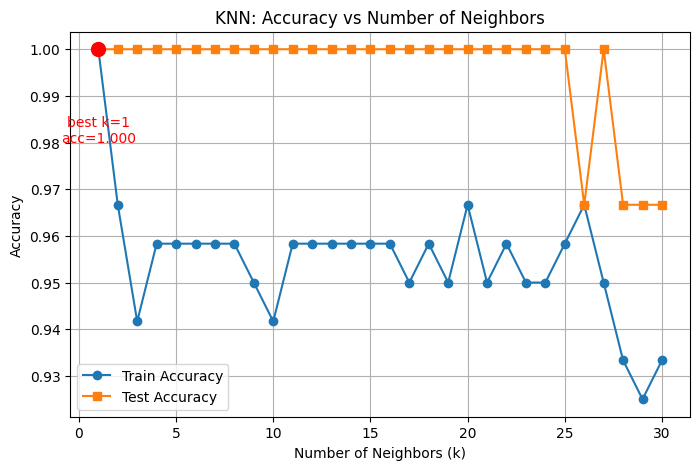

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

train_scores = []
test_scores = []
k_values = range(1, 31)  # k=1~30 시도

for k in k_values:
    knn = Pipeline([
        ("scaler", StandardScaler()),
        ("clf", KNeighborsClassifier(n_neighbors=k))
    ])
    knn.fit(X_train, y_train)
    train_scores.append(knn.score(X_train, y_train))
    test_scores.append(knn.score(X_test, y_test))

# 시각화
plt.figure(figsize=(8,5))
plt.plot(k_values, train_scores, marker='o', label='Train Accuracy')
plt.plot(k_values, test_scores, marker='s', label='Test Accuracy')
plt.xlabel('Number of Neighbors (k)')
plt.ylabel('Accuracy')
plt.title('KNN: Accuracy vs Number of Neighbors')
plt.legend()
plt.grid(True)

# 최고 Test Accuracy 표시
best_k = k_values[test_scores.index(max(test_scores))]
best_acc = max(test_scores)
plt.scatter(best_k, best_acc, color='red', s=100, zorder=5)
plt.text(best_k, best_acc-0.02, f"best k={best_k}\nacc={best_acc:.3f}",
        ha='center', color='red')

plt.show()


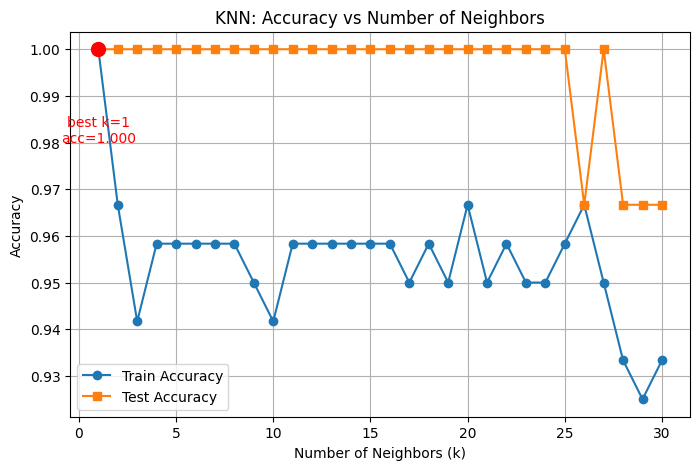

k==1이면 모델은 가장 가까운 단 하나의 점만 보고 판단하기 때문에 패턴이 정해지는게 아니라 과적합 상태나 마찬가지다.
그래서 테스트 데이터에서는 잘못 분류할 가능성이 높아진다.

k가 커질수록 Train Accuracy는 감소하고 일부 값이 낮아지는 구간들이 존재한다.
Test Accuracy는 완만한 값을 유지하지만 iris 데이터가 워낙 쉬운 데이터라 1.0 부근에 있는 것으로 보인다.